<a href="https://colab.research.google.com/github/LightenCooper/data_visualization/blob/main/HW_Netologia_statistics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
**Обязательная часть**

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Импортируем необходимые библиотеки

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Мною был выбран датасет с ценами на БикМак по странам за период с 01.01.2000 по 31.12.2022.
Индекс бигмака основан на теории паритета покупательной способности, по которой валютный курс должен уравнивать стоимость корзины товаров в разных странах (то есть отношение обменных валютных курсов), только вместо корзины берется один стандартный бургер, выпускаемый компанией McDonald’s повсеместно.

Попробуем рассмотреть динамику цен за 22 года, сравним стоимость по странам и годам.

**Дополнительная часть (необязательная)**

построить дополнительно не менее 2 визуализаций (итого не менее 6);

в работе должны присутствовать следующие визуализации: *boxplot*, heatmap,
scatter plot matrix;

**Для начала прочитаем датасет**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/LightenCooper/data_visualization/main/BigmacPrice.csv', header=0, names=['date', 'currency_code', 'country', 'local_price', 'dollar_ex',
       'dollar_price'])
df.head()

,date,currency_code,country,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1946 non-null   object 
 1   currency_code  1946 non-null   object 
 2   country        1946 non-null   object 
 3   local_price    1946 non-null   float64
 4   dollar_ex      1946 non-null   int64  
 5   dollar_price   1946 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 91.3+ KB


Датафрейм состоит из 6 столбцов и 1946 строк.
Столбцы:


*   Дата
*   Код валюты
*   Страна
*   Цена в валюте страны
*   Курс доллара
*   Цена в долларовом эквиваленте

Пропущенных значений нет

**Посмотрим, по каким странам представлены данные в датафрейме:**

In [ ]:
print(len(df['country'].unique()), df['country'].unique(), sep='\n')

74
['Argentina' 'Australia' 'Brazil' 'Britain' 'Canada' 'Chile' 'China'
 'Czech Republic' 'Denmark' 'Euro area' 'Hong Kong' 'Hungary' 'Indonesia'
 'Israel' 'Japan' 'Malaysia' 'Mexico' 'New Zealand' 'Poland' 'Russia'
 'Singapore' 'South Africa' 'South Korea' 'Sweden' 'Switzerland' 'Taiwan'
 'Thailand' 'United States' 'Philippines' 'Norway' 'Peru' 'Turkey'
 'Venezuela' 'Egypt' 'Colombia' 'Costa Rica' 'Pakistan' 'Saudi Arabia'
 'Sri Lanka' 'Ukraine' 'Uruguay' 'UAE' 'Austria' 'Belgium' 'Estonia'
 'Finland' 'France' 'Germany' 'Greece' 'India' 'Ireland' 'Italy'
 'Netherlands' 'Portugal' 'Spain' 'Lithuania' 'Vietnam' 'Azerbaijan'
 'Bahrain' 'Croatia' 'Guatemala' 'Honduras' 'Jordan' 'Kuwait' 'Latvia'
 'Lebanon' 'Moldova' 'Nicaragua' 'Oman' 'Qatar' 'Romania' 'Slovakia'
 'Slovenia' 'United Arab Emirates']


Видим, что ОАЭ встречается дважды, как 'UAE', и как 'United Arab Emirates'. Исправим.

In [ ]:
df['country'] = df['country'].str.replace('UAE', 'United Arab Emirates')

**Посмотрим динамику цен за все время. Для удобства обединим страны в части света и создадим столбец год (`"year"`)**

In [ ]:
continent = {'Argentina': 'South America',
             'Austria': 'Europe',
             'Australia': 'Oceania/S. Africa',
             'Belgium': 'Europe',
             'Bahrain': 'Middle East',
             'Brazil': 'South America',
             'Canada': 'North America',
             'Switzerland': 'Europe',
             'Chile': 'South America',
             'China': 'East Asia',
             'India': 'South Asia',
             'Vietnam': 'South Asia',
             'Jordan': 'Middle East',
             'Kuwait': 'Middle East',
             'Oman': 'Middle East',
             'Qatar': 'Middle East',
             'Lebanon': 'Middle East',
             'Czech Republic': 'Europe',
             'Lithuania': 'Europe',
             'Croatia': 'Europe',
             'Azerbaijan': 'Europe',
             'Latvia': 'Europe',
             'Moldova': 'Europe',
             'Slovenia': 'Europe',
             'Slovakia': 'Europe',
             'Romania': 'Europe',
             'Denmark': 'Europe',
             'Euro area': 'Europe',
             'Estonia': 'Europe',
             'France': 'Europe',
             'Finland': 'Europe',
             'Britain': 'Europe',
             'Hong Kong': 'East Asia',
             'Hungary': 'Europe',
             'Indonesia': 'South Asia',
             'Israel': 'Middle East',
             'Germany': 'Europe',
             'Greece': 'Europe',
             'Ireland': 'Europe',
             'Italy': 'Europe',
             'Netherlands': 'Europe',
             'Portugal': 'Europe',
             'Spain': 'Europe',
             'Japan': 'East Asia',
             'South Korea': 'East Asia',
             'Mexico': 'North America',
             'Malaysia': 'South Asia',
             'New Zealand': 'Oceania/S. Africa',
             'Poland': 'Europe',
             'Russia': 'Europe',
             'Sweden': 'Europe',
             'Switzerland': 'Europe',
             'Singapore': 'South Asia',
             'Thailand': 'South Asia',
             'Taiwan': 'East Asia',
             'United States': 'North America',
             'South Africa': 'Oceania/S. Africa',
             'Philippines': 'East Asia',
             'Norway': 'Europe',
             'Peru': 'South America',
             'Turkey': 'Middle East',
             'Egypt': 'Middle East',
             'Colombia': 'South America',
             'Costa Rica': 'North America',
             'Sri Lanka': 'South Asia',
             'Pakistan': 'Middle East',
             'Saudi Arabia': 'Middle East',
             'Ukraine': 'Europe',
             'Uruguay': 'South America',
             'United Arab Emirates': 'Middle East',
             'Venezuela': 'South America',
             'Guatemala': 'South America',
             'Honduras': 'South America',
             'Nicaragua': 'South America'
             }

**Сгруппируем данные по частям света**

In [ ]:
df['continent'] = df.country.map(continent)
country_count = df.groupby('continent')['country'].nunique().reset_index()
country_count

,continent,country
0,East Asia,6
1,Europe,31
2,Middle East,12
3,North America,4
4,Oceania/S. Africa,3
5,South America,10
6,South Asia,7


**Посмотрим распредение стран с данными о цене БикМака по частям света**

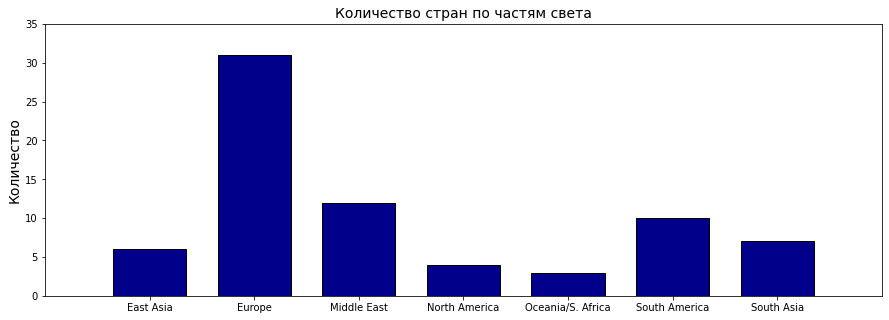

In [ ]:
plt.rcParams ['figure.figsize'] = [15, 5]
fig, ax = plt.subplots()

ax.bar(country_count['continent'], country_count['country'], width=0.7, edgecolor="k", linewidth=1, color='darkblue')

ax.set(xlim=(-1, 7),
       ylim=(0, 35))
plt.title('Количество стран по частям света', fontsize=14, color='k')
plt.ylabel('Количество', fontsize=14, color='k') 
plt.show()

Видим, что больше всего данных о цене БикМака в странах Европы, меньше всего в Южной Африке/Океании

**Добавим столбец `year` для группировке по годам**


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df

,date,currency_code,country,local_price,dollar_ex,dollar_price,continent,year
0,2000-04-01,ARS,Argentina,2.50,1,2.50,South America,2000
1,2000-04-01,AUD,Australia,2.59,1,2.59,Oceania/S. Africa,2000
2,2000-04-01,BRL,Brazil,2.95,1,2.95,South America,2000
3,2000-04-01,GBP,Britain,1.90,1,1.90,Europe,2000
4,2000-04-01,CAD,Canada,2.85,1,2.85,North America,2000
...,...,...,...,...,...,...,...,...
1941,2022-07-01,AED,United Arab Emirates,18.00,3,6.00,Middle East,2022
1942,2022-07-01,USD,United States,5.15,1,5.15,North America,2022
1943,2022-07-01,UYU,Uruguay,255.00,41,6.22,South America,2022
1944,2022-07-01,VES,Venezuela,10.00,5,2.00,South America,2022


**Сгруппируем данные по средней цене за каждый год**

In [ ]:
price_by_all_time = df.groupby(['year']).agg({'dollar_price': 'mean'}).reset_index()
price_by_all_time.head()

,year,dollar_price
0,2000,2.323929
1,2001,2.157143
2,2002,2.301212
3,2003,2.425312
4,2004,2.444000


**Построим график динамики цены за всё время во всех странах**

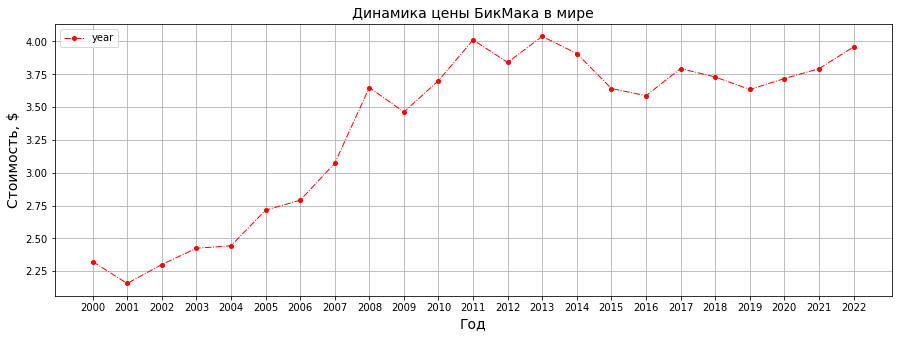

In [ ]:
plt.rcParams ['figure.figsize'] = [15, 5]
plt.plot(price_by_all_time['year'], price_by_all_time['dollar_price'], color='r', marker='.', linestyle='-.', linewidth=1, markersize=8)
plt.title('Динамика цены БикМака в мире', fontsize=14, color='k')
plt.xlabel('Год', fontsize=14, color='k')
plt.ylabel('Стоимость, $', fontsize=14, color='k') 
plt.legend(price_by_all_time, loc='upper left')
plt.xticks(price_by_all_time['year'])
plt.grid(True) 
plt.show()

Видим, что за 22 года в целом цена выросла практически в два раза. До 2007 года подъём был достаточно плавным. В 2008 рост был выше, чем в предыдущие годы. В 2011 и в 2013 годах был пик цены с последующим небольшим падением, но к 2022 году цена вновь приблизилась к отметке 4$.

**Сравним цены на БикМак в различных частях света за все время**

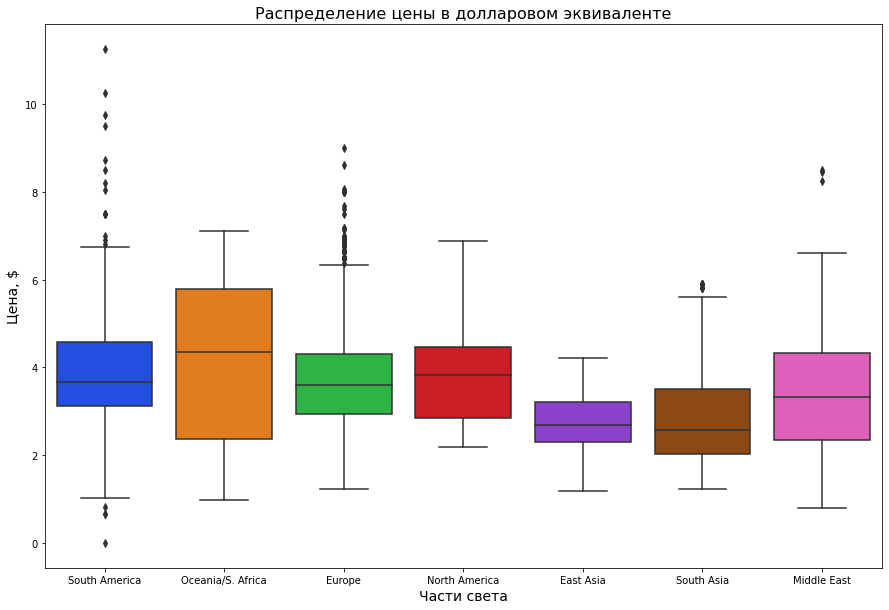

In [ ]:
plt.figure(figsize=(15, 10))
boxplot = sns.boxplot(x=df["continent"], y=df["dollar_price"], palette=sns.color_palette('bright'))
boxplot.axes.set_title("Распределение цены в долларовом эквиваленте", fontsize=16)
boxplot.set_xlabel("Части света", fontsize=14)
boxplot.set_ylabel("Цена, $", fontsize=14);

Видим, что самая высокая средняя цена в Океании/Южной Африке, однако по странам Европы и Южной Америки разброс цен выше, видимо встречаются страны с как с аномально низкой, так и аномально высокой ценой БикМака

**Создадим датафрейм, содержащий данные только по России**

In [ ]:
df_rus = df[df['country'] == 'Russia']
df_rus.head()

,date,currency_code,country,local_price,dollar_ex,dollar_price,continent,year
19,2000-04-01,RUB,Russia,39.5,28,1.41,Europe,2000
47,2001-04-01,RUB,Russia,35.0,28,1.25,Europe,2001
78,2002-04-01,RUB,Russia,39.0,31,1.26,Europe,2002
110,2003-04-01,RUB,Russia,41.0,31,1.32,Europe,2003
146,2004-05-01,RUB,Russia,42.0,29,1.45,Europe,2004


**Посмотрим, как изменялась цена БикМака в России в рублях, и как в долларовом эквиваленте**

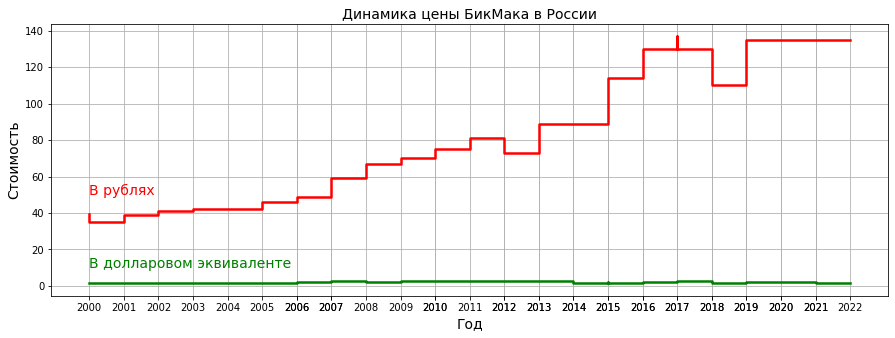

In [ ]:
plt.rcParams ['figure.figsize'] = [15, 5]
plt.step(df_rus['year'], df_rus['dollar_price'], linewidth=2.5, color='g')
plt.step(df_rus['year'], df_rus['local_price'], linewidth=2.5, color='r')
plt.text(2000, 50, 'В рублях', fontsize=14, color='r')
plt.text(2000, 10, 'В долларовом эквиваленте', fontsize=14, color='g')
plt.xticks(df_rus['year'])
plt.grid(True) 
plt.title('Динамика цены БикМака в России', fontsize=14, color='k')
plt.xlabel('Год', fontsize=14, color='k')
plt.ylabel('Стоимость', fontsize=14, color='k') 
plt.show()

Видим, что стоимость в рублях значительно выросла, но в пересчете на долларовый эквивалент практически не изменилась.

**Посмотрим на распределение цены в долларовом эквиваленте в разрезе континентов по годам**

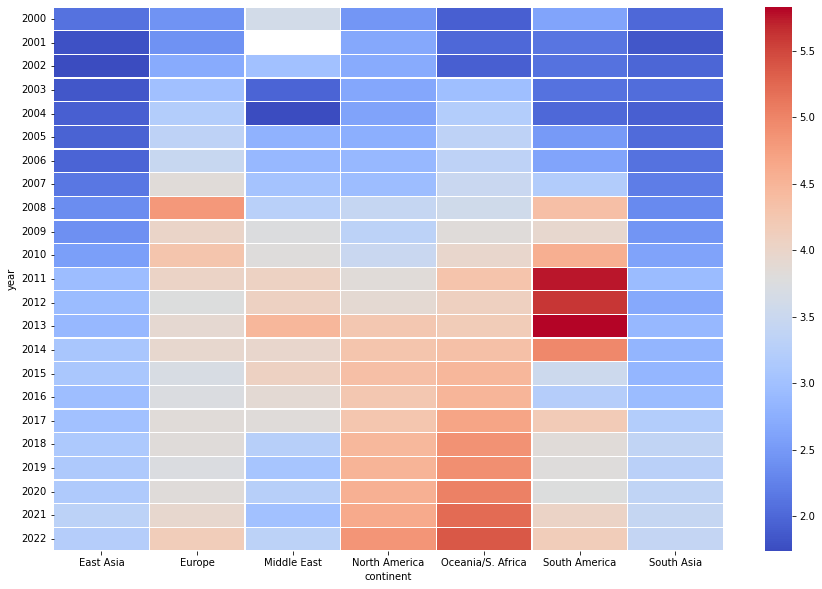

In [ ]:
mean_price_continent = df.pivot_table(
                        index='year', 
                        columns='continent', 
                        values='dollar_price', 
                        aggfunc='mean')
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(mean_price_continent, linewidths= .3, cmap=sns.color_palette("coolwarm", as_cmap=True))

По тепловой карте явно видно, что в Восточной и Южной Азии цена держалась на примерно одной отметке, а рост за всё время незначительный.

В Северной Америке и Южной Арфике/Океании цена за все время плавно росла.

В Южной Америке в 2011-2014 годах было резкое увеличение цены, которое в дальнейшем частично откотилось и сейчас держится на уровне 2009 года.

На Ближнем Востоке был похожий скачок в 2009-2017 годах, который был не на столько выражен, как в Южной Америке, но цена так же откатилась к отметке 2009 года.

Также, в Европе и Южной Арфике/Океании можно отметить, что рост цены достаточно плавный.

**Посмотрим, как связаны цены между континентами**

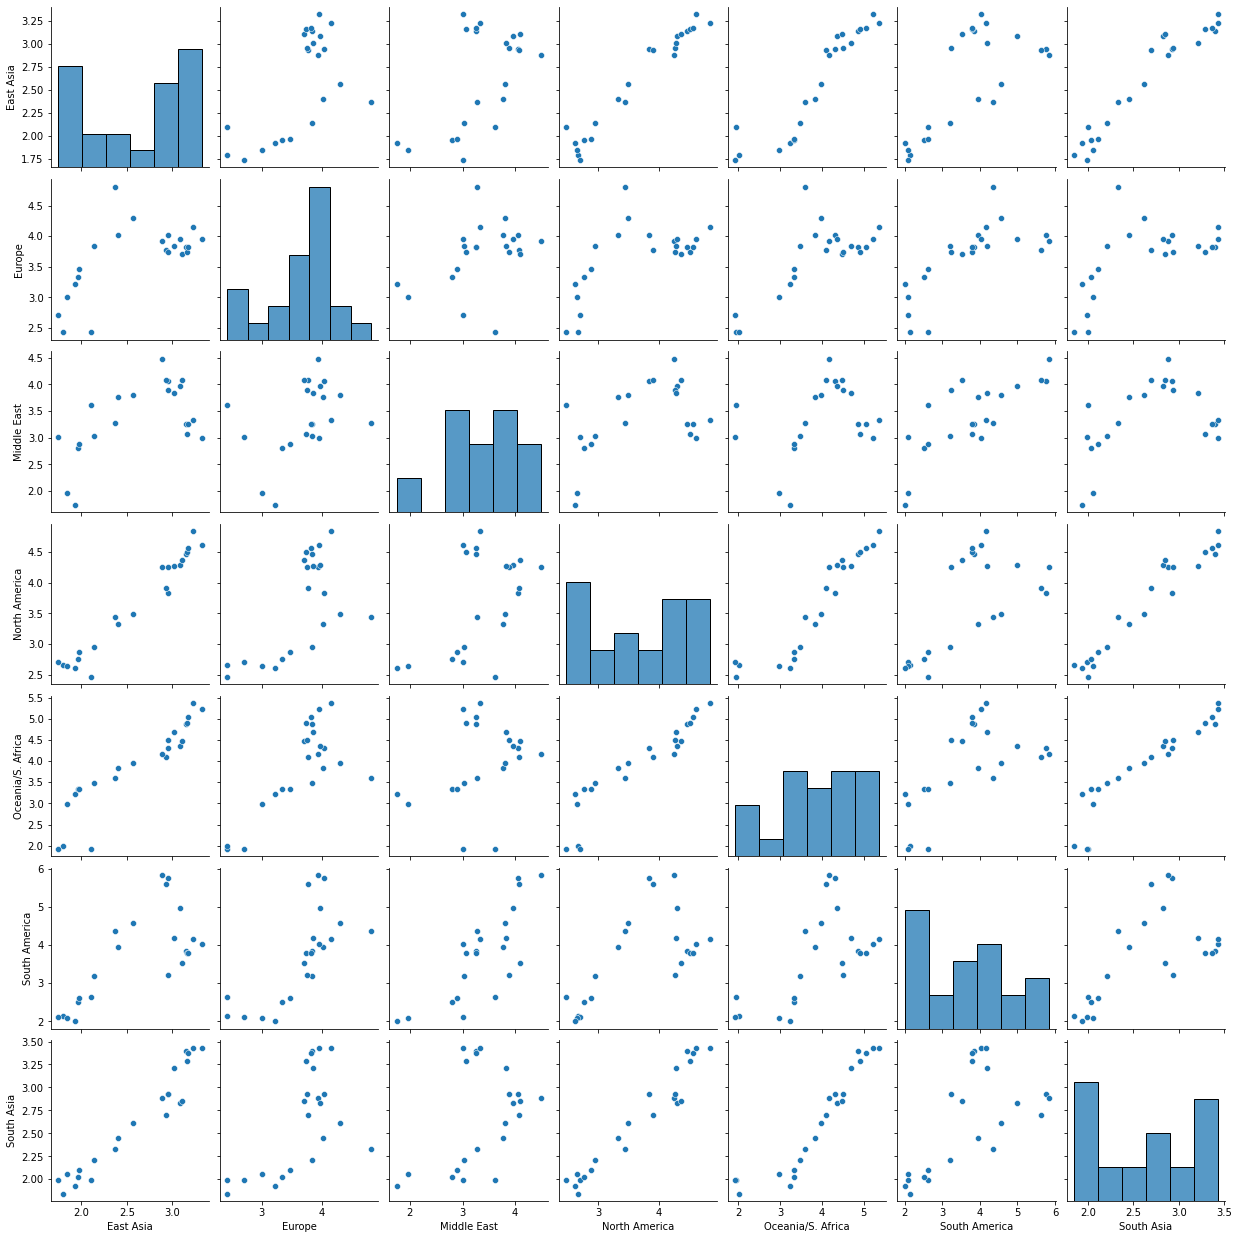

In [ ]:
price_continent = df.pivot_table(
                        index='year', 
                        columns='continent', 
                        values='dollar_price', 
                        aggfunc='mean')
sns.pairplot(price_continent)